# Simulators


## Introduction

This notebook shows how to import the *Qiskit Aer* simulator backend and use it to run ideal (noise free).

In [1]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

## The AerSimulator




1. `AerSimulator.available_devices()` : Return the available simulation devices.
2. `AerSimulator.available_methods()` : Return the available simulation methods.

In [2]:
simulator = AerSimulator()

## Simulating a Quantum Circuit

The basic operation runs a quantum circuit and returns a counts dictionary of measurement outcomes. Here we run a simple circuit that prepares a 2-qubit Bell-state $\left|\psi\right\rangle = \frac{1}{\sqrt{2}}\left(\left|0,0\right\rangle + \left|1,1 \right\rangle\right)$
and measures both qubits.

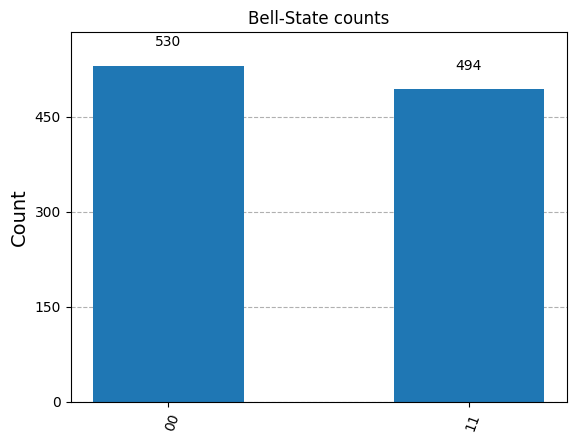

In [3]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')


### Returning measurement outcomes for each shot

The `Simulator` also supports returning a list of measurement outcomes for each individual shot. This is enabled by setting the keyword argument `memory=True` in the run.


In [4]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '11', '11', '00', '11', '11', '11', '11', '00', '11']



### Aer Simulator Options

The `AerSimulator` backend supports a variety of configurable options which can be updated using the set_options method. See the AerSimulator API documentation for additional details.


### Simulation Method

The `AerSimulator` supports a variety of simulation methods, each of which supports a different set of instructions. The method can be set manually using `simulator(method=value)` option, or a simulator backend with a preconfigured method can be obtained directly from the `AerSimulator` 

When simulating ideal circuits, changing the method between the exact simulation methods `stabilizer`, `statevector`, `density_matrix` and `matrix_product_state` should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

### Simulation Method Option

The simulation method is set using the method kwarg. A list supported simulation methods can be returned using available_methods(), these are

1.  `"automatic"`: Default simulation method. Select the simulation method automatically based on the circuit and noise model.

2.  `"statevector"`: A dense statevector simulation that can sample measurement outcomes from ideal circuits with all measurements at end of the circuit. For noisy simulations each shot samples a randomly sampled noisy circuit from the noise model.
    
    
3. `"density_matrix"`: A dense density matrix simulation that may sample measurement outcomes from noisy circuits with all measurements at end of the circuit.
    
4. `"stabilizer"`: An efficient Clifford stabilizer state simulator that can simulate noisy Clifford circuits if all errors in the noise model are also Clifford errors.
    
    
5. `"extended_stabilizer"`: An approximate simulated for Clifford + T circuits based on a state decomposition into ranked-stabilizer state. The number of terms grows with the number of non-Clifford (T) gates.
    
    
6. `"matrix_product_state"`: A tensor-network statevector simulator that uses a Matrix Product State (MPS) representation for the state. This can be done either with or without truncation of the MPS bond dimensions depending on the simulator options. The default behaviour is no truncation.
    
    
7. `"unitary"`: A dense unitary matrix simulation of an ideal circuit. This simulates the unitary matrix of the circuit itself rather than the evolution of an initial quantum state. This method can only simulate gates, it does not support measurement, reset, or noise.
    
8.  `"superop"`: A dense superoperator matrix simulation of an ideal or noisy circuit. This simulates the superoperator matrix of the circuit itself rather than the evolution of an initial quantum state. This method can simulate ideal and noisy gates, and reset, but does not support measurement.


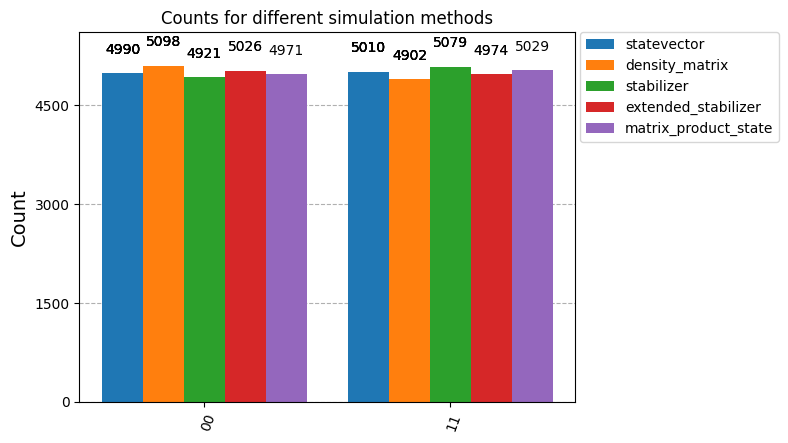

In [5]:
# Increase shots to reduce sampling variance
shots = 10000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)


# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])


#### Automatic Simulation Method

The default simulation method is automatic which will automatically select a one of the other simulation methods for each circuit based on the instructions in those circuits. A fixed simulation method can be specified by by adding the method name when getting the backend, or by setting the method option on the backend.


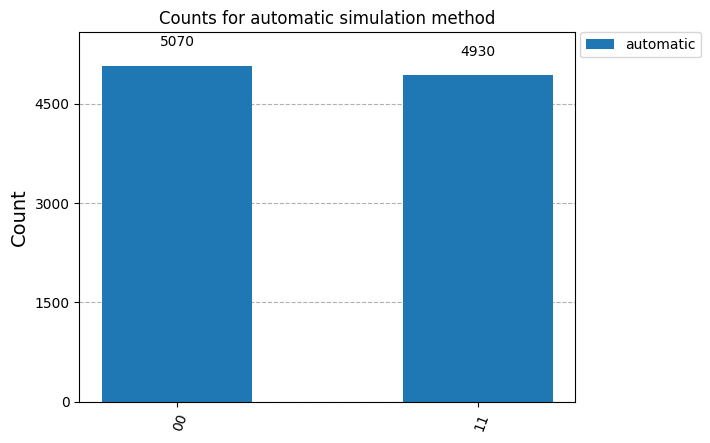

In [6]:

# automatic
sim_automatic = AerSimulator(method='automatic')
job_automatic = sim_automatic.run(circ, shots=shots)
counts_automatic = job_automatic.result().get_counts(0)

plot_histogram([counts_automatic], title='Counts for automatic simulation method',legend=[ 'automatic'])

### GPU Simulation
The `statevector`, `density_matrix` and `unitary` simulators support running on a NVidia GPUs. For these methods the simulation device can also be manually set to CPU or GPU using `simulator = AerSimmulator(method='statevector',device='GPU')` backend option.


In [7]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='statevector', device='GPU')

except AerError as e:
    print(e)

## Installing GPU Support

In order to install and run the GPU supported simulators on Linux, you need CUDA® 11.2 or newer previously installed. CUDA® itself would require a set of specific GPU drivers. Please follow CUDA® installation procedure in the NVIDIA® [web](https://www.nvidia.com/drivers).

If you want to install our GPU supported simulators, you have to install this other package:

```python
pip install qiskit-aer-gpu
```

The package above is for CUDA&reg 12, so if your system has CUDA® 11 installed, install separate package:

```python
pip install qiskit-aer-gpu-cu11
```

This will overwrite your current `qiskit-aer` package installation giving you the same functionality found in the canonical `qiskit-aer` package, plus the ability to run the GPU supported simulators: `statevector`, `density matrix`, and `unitary`.

Note: This package is only available on x86_64 Linux. For other platforms that have CUDA support, you will have to build from source. You can refer to the [contributing guide](https://github.com/Qiskit/qiskit-aer/blob/main/CONTRIBUTING.md#building-with-gpu-support) for instructions on doing this.

In [8]:
from qiskit_aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = AerSimulator(method='tensor_network', device='GPU')

except AerError as e:
    print(e)

### Simulation Precision

One of the available simulator options allows setting the float precision for the `statevector`, `density_matrix`, `unitary` and `superop` methods. This is done using the `set_precision="single"` or `precision="double"` (default) option:

In [9]:
simulator = AerSimulator(method='statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'11': 531, '00': 493}


Setting the simulation precision applies to both CPU and GPU simulation devices. Single precision will halve the required memory and may provide performance improvements on certain systems.

## Custom Simulator Instructions

### Saving the simulator state

The state of the simulator can be saved in a variety of formats using custom simulator instructions.


| Circuit method | Description |Supported Methods | 
|----------------|-------------|------------------|
| `save_state` | Save the simulator state in the native format for the simulation method | All | 
| `save_statevector` | Save the simulator state as a statevector | `"automatic"`, `"statevector"`, `"matrix_product_state"`, `"extended_stabilizer"`|
| `save_stabilizer` | Save the simulator state as a Clifford stabilizer | `"automatic"`, `"stabilizer"`| 
| `save_density_matrix` | Save the simulator state as a density matrix | `"automatic"`, `"statevector"`, `"matrix_product_state"`, `"density_matrix"` |
| `save_matrix_product_state` | Save the simulator state as a a matrix product state tensor | `"automatic"`, `"matrix_product_state"`|
| `save_unitary` | Save the simulator state as unitary matrix of the run circuit | `"automatic"`, `"unitary"`|
| `save_superop` | Save the simulator state as superoperator matrix of the run circuit | `"automatic"`, `"superop"`|

Note that these instructions are only supported by the Aer simulator and will result in an error if a circuit containing them is run on a non-simulator backend such as an IBM Quantum device.

### Saving the final statevector
To save the final statevector of the simulation we can append the circuit with the `save_statevector` instruction. Note that this instruction should be applied before any measurements if we do not want to save the collapsed post-measurement state


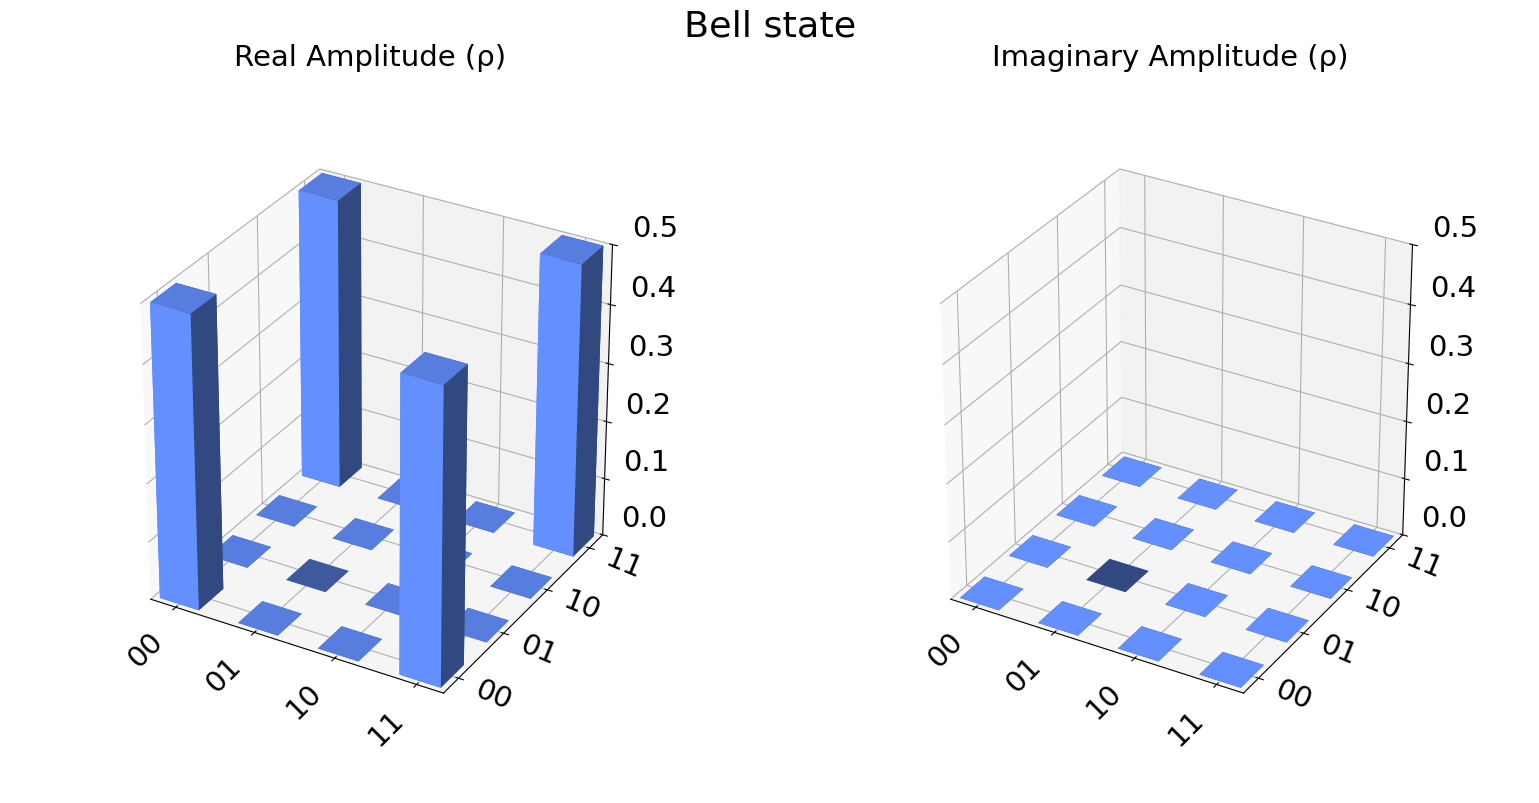

In [10]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')


### Saving the circuit unitary

To save the unitary matrix for a `QuantumCircuit` we can append the circuit with the `save_unitary` instruction. Note that this circuit cannot contain any measurements or resets since these instructions are not supported on for the `"unitary"` simulation method


In [11]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = AerSimulator(method = 'unitary')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711-0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711+0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711-0.j]
 [ 0.70711+0.j -0.70711+0.j  0.     +0.j  0.     +0.j]]



### Saving multiple states

We can also apply save instructions at multiple locations in a circuit. Note that when doing this we must provide a unique label for each instruction to retrieve them from the results


In [12]:
# Construct quantum circuit without measure
steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = AerSimulator(method= 'automatic')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

### Setting the simulator to a custom state

The `AerSimulator` allows setting a custom simulator state for several of its simulation methods using custom simulator instructions

| Circuit method | Description |Supported Methods | 
|----------------|-------------|------------------|
| `set_statevector` | Set the simulator state to the specified statevector | `"automatic"`, `"statevector"`, `"density_matrix"`|
| `set_stabilizer` | Set the simulator state to the specified Clifford stabilizer | `"automatic"`, `"stabilizer"`| 
| `set_density_matrix` | Set the simulator state to the specified  density matrix | `"automatic"`, `"density_matrix"` |
| `set_unitary` | Set the simulator state to the specified  unitary matrix | `"automatic"`, `"unitary"`, `"superop"`|
| `set_superop` | Set the simulator state to the specified superoperator matrix | `"automatic"`, `"superop"`|


**Notes:**
* These instructions must be applied to all qubits in a circuit, otherwise an exception will be raised.
* The input state must also be a valid state (statevector, density matrix, unitary etc) otherwise an exception will be raised.
* These instructions can be applied at any location in a circuit and will override the current state with the specified one. Any classical register values (e.g. from preceding measurements) will be unaffected
* Set state instructions are only supported by the Aer simulator and will result in an error if a circuit containing them is run on a non-simulator backend such as an IBM Quantum device.

#### Setting a Custom Statevector

The set_statevector instruction can be used to set a custom Statevector state. The input statevector must be valid ($|\langle\psi|\psi\rangle|=1$)

In [13]:
# Generate a random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='statevector')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

#### Using the initialize instruction

It is also possible to initialize the simulator to a custom statevector using the `initialize` instruction. Unlike the `set_statevector` instruction this instruction is also supported on real device backends by unrolling to reset and standard gate instructions.

In [14]:
# Use initilize instruction to set initial state
circ = QuantumCircuit(num_qubits)
circ.initialize(psi, range(num_qubits))
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method= 'statevector')
circ = transpile(circ, simulator)

# Run and get result data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([-0.49859823-0.41410205j,  0.12480824+0.46132192j,
               0.33634191+0.30214216j,  0.234309  +0.3036574j ],
             dims=(2, 2))}

#### Setting a custom density matrix

The `set_density_matrix` instruction can be used to set a custom `DensityMatrix` state. The input density matrix must be valid ($Tr[\rho]=1, \rho \ge 0$)

In [15]:
num_qubits = 2
rho = qi.random_density_matrix(2 ** num_qubits, seed=100)
circ = QuantumCircuit(num_qubits)
circ.set_density_matrix(rho)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='density_matrix')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'density_matrix': DensityMatrix([[ 0.2075308 +0.j        ,  0.13161422-0.01760848j,
                  0.0442826 +0.07742704j,  0.04852053-0.01303171j],
                [ 0.13161422+0.01760848j,  0.20106116+0.j        ,
                  0.02568549-0.03689812j,  0.0482903 -0.04367912j],
                [ 0.0442826 -0.07742704j,  0.02568549+0.03689812j,
                  0.39731492+0.j        , -0.01114025-0.13426423j],
                [ 0.04852053+0.01303171j,  0.0482903 +0.04367912j,
                 -0.01114025+0.13426423j,  0.19409312+0.j        ]],
               dims=(2, 2))}

#### Setting a custom stabilizer state

The `set_stabilizer` instruction can be used to set a custom `Clifford` stabilizer state. The input stabilizer must be a valid `Clifford`.

In [16]:
# Generate a random Clifford C
num_qubits = 2
stab = qi.random_clifford(num_qubits, seed=100)

# Set initial state to stabilizer state C|0>
circ = QuantumCircuit(num_qubits)
circ.set_stabilizer(stab)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method= "stabilizer")
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'stabilizer': StabilizerState(['+ZZ', '-IZ'])}

#### Setting a custom unitary

The `set_unitary` instruction can be used to set a custom unitary `Operator` state. The input unitary matrix must be valid ($U^\dagger U=\mathbb{1}$)

In [17]:
# Generate a random unitary
num_qubits = 2
unitary = qi.random_unitary(2 ** num_qubits, seed=100)

# Set initial state to unitary
circ = QuantumCircuit(num_qubits)
circ.set_unitary(unitary)
circ.save_state()

# Transpile for simulator
simulator = AerSimulator(method='unitary')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'unitary': Operator([[-0.44885724-0.26721573j,  0.10468034-0.00288681j,
             0.4631425 +0.15474915j, -0.11151309-0.68210936j],
           [-0.37279054-0.38484834j,  0.3820592 -0.49653433j,
             0.14132327-0.17428515j,  0.19643043+0.48111423j],
           [ 0.2889092 +0.58750499j,  0.39509694-0.22036424j,
             0.49498355+0.2388685j ,  0.25404989-0.00995706j],
           [ 0.01830684+0.10524311j,  0.62584001+0.01343146j,
            -0.52174025-0.37003296j,  0.12232823-0.41548904j]],
          input_dims=(2, 2), output_dims=(2, 2))}

In [18]:
import qiskit
qiskit.__version__

'1.1.0'